In [1]:
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
import pandas as pd
from sklearn.datasets import make_circles, make_blobs, make_moons, make_s_curve, make_swiss_roll
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# import clustering evaluation metrics
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score,homogeneity_completeness_v_measure, davies_bouldin_score, calinski_harabasz_score

## Clustering overview

Clustering is a technique used in machine learning to group similar data points into clusters. The goal is to find patterns or structures in the data that may not be apparent initially. Clustering is very useful in a variety of applications such as variable reduction, customer segmentation, anomaly detection, fraud detection, image segmentation, grouping search results etc. They help enrich the data into sensible clusters so that this enriched data can be fed into other machine learning algorithms too.

> Interesting fact: Clustering originated around 1930s in psychology and its allied fields!


The process of clustering involves grouping together data points that are similar to each other based on specific features or criteria. Clustering aims to partition a given data set into  clusters such that the data points in the same cluster are more similar to each other than those in different clusters.

There are several types of clustering algorithms, each with its own strengths and weaknesses. Some popular clustering algorithms include K-Means, Spectral clustering, DBSCAN, and Hierarchical clustering.

The K-Means clustering algorithm is one of the most widely used clustering algorithms. It is a centroid-based algorithm, where each cluster is represented by its centroid. 

Clustering can be hard or soft assignment:
KMeans is a hard assignment , i.e each data point is assigned to only one cluster.
Whereas algorithms like GMM (Gaussian mixture models) can do soft assignment i.e assign data point to more than one cluster probabilistically.

Clustering has the following notable limitations:
1. It is hard to determine the number of clusters particularly when data understanding is limited
2. It is difficult to determine the number of important features required for clustering
3. It is difficult to validate and evaluate the clusterings

**Some important clustering algorithms:**
(not exhaustive, there are many clustering algorithm variants)

1. **Hierarchical Clustering Algorithms**

    Hierarchical clustering algorithms are a set of algorithms that build a hierarchy of clusters. The two main types of hierarchical clustering algorithms are agglomerative and divisive. Agglomerative algorithms (bottom-up) start with each data point as its own cluster and iteratively merge the closest pairs of clusters until a single cluster is formed. Whereas, divisive algorithms start with all data points in one cluster and iteratively split the cluster into smaller clusters until each data point is in its own cluster.

    Among agglomerative algos, BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a widely used algorithm. It uses a tree-based data structure to efficiently cluster large datasets without having to store all of the data points in memory. BIRCH uses a tree structure called a CF-tree (Clustering Feature tree) to recursively partition the data into smaller subclusters. Each node in the tree represents a cluster, and the CF-tree stores information about the number of data points, the centroid, and the variance of the data points in each cluster. BIRCH is particularly useful for applications where memory and computational resources are limited

    _Advantage_ : No need to specify number of clusters, can visualize dendrograms
    <br/> _Disadvantage_ : Computationally expensive for large datasets, sensitive to noise.

2. **Density-Based Clustering Algorithms**

    Density-based clustering algorithms, such as DBSCAN, group data points based on their proximity to one another. They are particularly useful for identifying clusters of irregular shapes and varying densities. These algorithms work by defining a neighborhood around each data point and then grouping together data points that fall within a certain distance threshold.

    HDBSCAN is a hierarchical density-based clustering algorithm that extends DBSCAN by allowing clusters to have varying densities. It works by building a tree of clusters, where each node represents a cluster and the parent-child relationships represent the hierarchy of the clusters. The algorithm starts by finding the densest region in the data and assigning the data points in that region to a cluster. It then recursively expands the cluster by adding neighboring data points that satisfy a density criterion. This process continues until all data points have been assigned to a cluster.
    
    _Advantage_: Can handle clusters of different shapes and sizes, can identify noise points
    <br/> _Disadavantage_: Requires setting of distance and density parameters.Sensitive to hyperparameters

3. **Guassian mixture models**

    Gaussian Mixture Models is a distribution-based clustering algorithm that assumes that the data points in each cluster are drawn from a particular statistical distribution, typically a Gaussian distribution. These algorithms work by estimating the parameters of the underlying distributions and then assigning data points to the cluster with the highest probability of generating them. 

    _Advantage_ : Being a probabilistic model, it allows gathering statistics like uncertainty estimates
    <br/> _Disadavantage_: sensitive to initial conditions

4. **Affinity propogation**
    It is a graph-based clustering algorithm that operates by iteratively updating messages between data points to determine which points are most similar to each other and thus should belong to the same cluster.

    _Advantage_ : can handle a wide range of data types, including categorical, ordinal, and continuous data.
    <br/> _Disadavantage_:high computational cost and sensitivity to the choice of parameters 

Another way of looking at clustering is: _transinductive clustering_ vs _inductive clustering_. Transductive clustering is a type of clustering that combines elements of both supervised and unsupervised learning. Transductive inference is derived from observed training cases that map to specific test cases whereas _inductive_ clusters are derived from training cases mapping to general rules which are only then applied to test cases. Unlike traditional unsupervised clustering, which assigns all data points to clusters without any prior knowledge of their labels, transductive clustering makes use of the labeled data to guide the clustering process.


Instead of short summary for KMeans and Spectral, Lets look at them in depth ahead

#### 1. KMeans


K-Means is a popular unsupervised clustering algorithm used in machine learning and data mining. It is a centroid-based algorithm, where each cluster is represented by its centroid (or center point). The algorithm works by iteratively assigning each data point to the nearest centroid and then recalculating the centroid of each cluster as the mean of all data points assigned to it. This process is repeated until the centroids no longer move significantly.

This algorithm requires the choice of 'k', or the number of clusters to form, after which the algorithm determines the center point of a cluster and gathers data around that point. The center is determined by the nearest mean, thus the name. The squared distance from the cluster is minimized.

The K-Means algorithm has become popular due to its simplicity, speed, and versatility. It is a widely used clustering algorithm because it can handle a variety of data types, including numerical, categorical, and binary data. K-Means can also be used for both exploratory and confirmatory data analysis.

K-means performs best when clusters are:
<br/> - round or spherical
<br/> - equally sized
<br/> - equally dense
<br/> - most dense in the center of the sphere
<br/> - not contaminated by noise/outliers

_Disadvantages_: It is sensitive to initialization, requires specifying number of clusters


Following are the steps in KMeans:

1. Choose the number of clusters (k) - The first step is to determine the number of clusters we want to create. This is typically done by analyzing the data and speculating the number of distinct groups that may exist.
2. Initialize the centroids - Next, we need to initialize the centroids. There are several methods for doing this, but the most common approach is to randomly select k data points from the dataset and use them as the initial centroids.
3. Assign data points to clusters - Once the centroids are initialized, we can assign each data point to the nearest centroid. This is done by calculating the distance between each data point and each centroid, and assigning the data point to the centroid with the smallest distance.
4. Recalculate centroids - After all data points have been assigned to clusters, we need to recalculate the centroids. This is done by taking the mean of all data points in each cluster, and using the resulting values as the new centroids.
5. Repeat until convergence - The previous two steps are repeated until the centroids no longer move significantly. This means that the algorithm has converged and the clusters are stable.


#### KMeans ++

K-Means++ is an extension of the K-Means algorithm that aims to improve the initial placement of the centroids, which is one of the main limitations of the original K-Means algorithm.

The K-Means++ algorithm works by selecting the initial centroids in a way that is more likely to lead to a better final clustering solution. Essentially, the points father away from one another are preferred as initial centriods. The algorithm works as follows:

1. Choose the first centroid randomly from the data points.
2. For each data point, calculate its distance to the nearest centroid.
3. Choose the next centroid from the remaining data points, with probability proportional to the square of the distance to the nearest centroid.
4. Repeat steps 2-3 until k centroids have been selected.

Time complexity of KMeans:  Time requirements for K-means are modest-basically linear in the number of data points. In particular, the time required is O(I*k*m*n), where I is the number of iterations required for convergence, which is often
small. Therefore K-means is in practice linear in n, the number of points

> **Below are KMeans and KMeans ++ implemented from scratch**

In [2]:
def select_centroids(X,k): # For kmeans++
    centriods = X[np.random.choice(X.shape[0],1)].reshape(1,-1) # first of K randomly picked
    count_k = 1
    while count_k<k:
        probs = np.zeros(X.shape[0])
        for idx,i in enumerate(X):
            probs[idx] = (np.array(list(map(lambda x : np.linalg.norm((i-x)),centriods))).min())
        probs = (probs/np.sum(probs)) # probabilities proportional to the point's distance from closest centroid
        tmp_c = np.array(X[np.random.choice(X.shape[0], p=probs)]).reshape(1,-1)
        count_k = count_k+1
        centriods = np.vstack((centriods,tmp_c))
    return centriods

def kmeans(X:np.ndarray, k:int, centroids=None, max_iter=30, tolerance=1e-2):
    idx_s = np.random.choice(X.shape[0],k)
    if centroids == 'kmeans++':
        centroids = select_centroids(X,k)
    else:
        centroids = X[idx_s,:]
    print(f'first random selection of centriods are the points :{idx_s}')
    iter_ = 1

    clusters = dict()
    while iter_<=max_iter:
        clusters = dict() # initiating clusters dictionary
        for idx,i in enumerate(X):
            cluster_num = np.argmin(list(map(lambda x : np.linalg.norm((i-x)),centroids))) # cluster to which point belongs,check
            clusters.setdefault(cluster_num, set()).add(idx)  
        
        new_centroids = np.zeros_like(centroids)
        for i in clusters.items():
            new_centroids[i[0]]=np.average(X[list(i[1]),:], axis=0)
        
        if np.linalg.norm(centroids-new_centroids, axis=1).mean()<=tolerance: break
        centroids = new_centroids
        iter_ = iter_ + 1
    labels = []
    
    print(f'ran for {iter_} iterations and created {len(clusters)} clusters with sizes: {list(map(lambda x: len(x[1]),clusters.items()))}')
    for i in X:
        labels.append(np.argmin(list(map(lambda x : np.linalg.norm((i-x)),centroids))))

    return centroids, labels

In [3]:
# converting the above kmeans function to a class
class KMeans_from_scratch:
    def __init__(self, k, centroids=None, max_iter=30, tolerance=1e-2):
        self.k = k
        self.centroids = centroids
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.labels = None
        self.clusters = None

    def fit(self, X):
        idx_s = np.random.choice(X.shape[0],self.k)
        if self.centroids == 'kmeans++':
            self.centroids = select_centroids(X,self.k)
        else:
            self.centroids = X[idx_s,:]
        print(f'first random selection of centriods are the points :{idx_s}')
        iter_ = 1

        self.clusters = dict()
        while iter_<=self.max_iter:
            self.clusters = dict() # initiating clusters dictionary
            for idx,i in enumerate(X):
                cluster_num = np.argmin(list(map(lambda x : np.linalg.norm((i-x)),self.centroids))) # cluster to which point belongs,check
                self.clusters.setdefault(cluster_num, set()).add(idx)  
            
            new_centroids = np.zeros_like(self.centroids)
            for i in self.clusters.items():
                new_centroids[i[0]]=np.average(X[list(i[1]),:], axis=0)
            
            if np.linalg.norm(self.centroids-new_centroids, axis=1).mean()<=self.tolerance: break
            self.centroids = new_centroids
            iter_ = iter_ + 1
        self.labels = []
        
        print(f'ran for {iter_} iterations and created {len(self.clusters)} clusters with sizes: {list(map(lambda x: len(x[1]),self.clusters.items()))}')
        for i in X:
            self.labels.append(np.argmin(list(map(lambda x : np.linalg.norm((i-x)),self.centroids))))


    def predict(self, X):
        labels = []
        for i in X:
            labels.append(np.argmin(list(map(lambda x : np.linalg.norm((i-x)),self.centroids))))
        return labels

In [4]:
X = np.array([92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86, 85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]).reshape(-1,1)

In [5]:
# quick check through self written function of kmeans
c,l = kmeans(X,3)

first random selection of centriods are the points :[15  2 10]
ran for 3 iterations and created 3 clusters with sizes: [9, 2, 5]


In [6]:
#centroids
print(c)

#labels
print(l)

[[93.23222222]
 [77.355     ]
 [86.762     ]]
[0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0]


In [7]:
# calling the KMeans class
kmeans_obj = KMeans_from_scratch(k=3, max_iter=30, tolerance=1e-2)

kmeans_obj.fit(X)

first random selection of centriods are the points :[2 9 0]
ran for 2 iterations and created 3 clusters with sizes: [9, 1, 6]


In [8]:
# printing the centroids and labels

print(kmeans_obj.centroids)

print(kmeans_obj.labels)


[[74.06      ]
 [85.74333333]
 [93.23222222]]
[2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2]


In [9]:
# KMEANS++ implementation

kmeans_obj = KMeans_from_scratch(k=3, centroids = 'kmeans++', max_iter=30, tolerance=1e-2)

kmeans_obj.fit(X)


first random selection of centriods are the points :[ 3 11 14]
ran for 3 iterations and created 3 clusters with sizes: [9, 2, 5]


In [10]:
# printing the centroids and labels

print(kmeans_obj.centroids)

print(kmeans_obj.labels)


[[93.23222222]
 [77.355     ]
 [86.762     ]]
[0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0]


> Lets look at few more implementations of KMeans in Sklearn

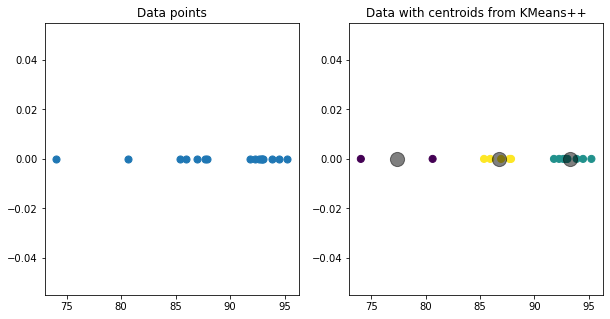

In [11]:
# KMeans from sklearn
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=30, n_init=10, random_state=0)
y_kmeans_sklearn = kmeans.fit_predict(X)

# plotting the results along with voronoi tessellations.
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X[:, 0], np.zeros_like(X[:, 0]), s=50, cmap='viridis')
# adding subplot title
plt.title('Data points')

plt.subplot(122)
plt.scatter(X[:, 0], np.zeros_like(X[:, 0]), c=y_kmeans_sklearn, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], np.zeros_like(centers[:, 0]), c='black', s=200, alpha=0.5);
# adding subplot title
plt.title('Data with centroids from KMeans++')
plt.show()

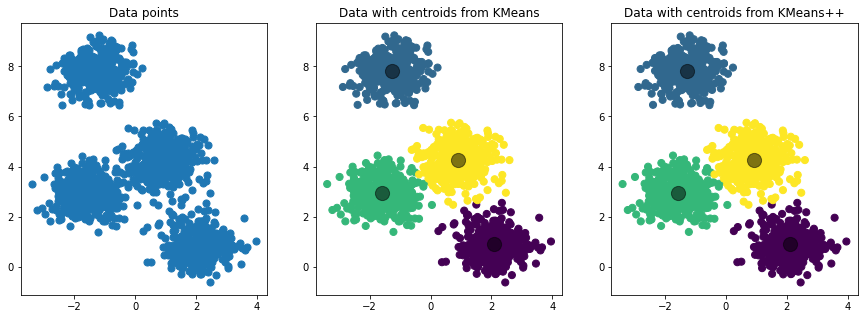

In [12]:
# Lets pick another dataset and see how the kmeans++ and KMeans perform
X, y = make_blobs(n_samples=1500, centers=4, cluster_std=0.60, random_state=0)

# KMeans from sklearn
kmeans = KMeans(n_clusters=4, max_iter=30, n_init=10, random_state=0)
y_kmeans_sklearn = kmeans.fit_predict(X)

# plotting the results along with voronoi tessellations.
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
# adding subplot title
plt.title('Data points')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_sklearn, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# adding subplot title
plt.title('Data with centroids from KMeans')

# KMeans++ from sklearn
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=30, n_init=10, random_state=0)
y_kmeans_sklearn = kmeans.fit_predict(X)


plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_sklearn, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# adding subplot title
plt.title('Data with centroids from KMeans++')
plt.show()

##### 1.1 Analysing num of clusters and the clustering efficiency

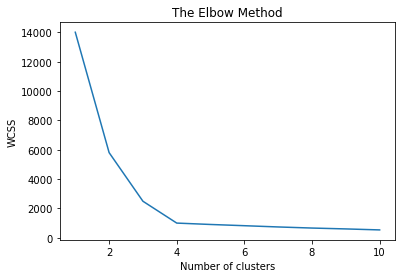

In [13]:
# Lets look at elbow method to find the optimal number of clusters for the above dataset
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Silhouette score for the above dataset
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=30, n_init=10, random_state=0)
    y_kmeans_sklearn = kmeans.fit_predict(X)
    print(f'For {i} clusters, silhouette score is {silhouette_score(X, y_kmeans_sklearn)}')


For 2 clusters, silhouette score is 0.559185498758421
For 3 clusters, silhouette score is 0.6084576899855884
For 4 clusters, silhouette score is 0.6788253695934573
For 5 clusters, silhouette score is 0.5777350807951825
For 6 clusters, silhouette score is 0.4735159666188228
For 7 clusters, silhouette score is 0.4156944924953986
For 8 clusters, silhouette score is 0.31988860743732955
For 9 clusters, silhouette score is 0.32106401192745476
For 10 clusters, silhouette score is 0.3372568894731231


Silhouette Coefficient measures the between-cluster distance against within-cluster distance. A higher score signifies better-defined clusters.
Notice 4 clusters are the best even through silhoutte score

In [15]:
# lets look at other clustering evaluation metrics when true label is known in training set

# Rand index
print(f'Rand index for the above dataset is {adjusted_rand_score(y, y_kmeans_sklearn)}')

# Mutual information based scores
print(f'Mutual information based scores for the above dataset is {adjusted_mutual_info_score(y, y_kmeans_sklearn)}')

# Homogeneity, completeness and V-measure
print(f'Homogeneity, completeness and V-measure for the above dataset is {homogeneity_completeness_v_measure(y, y_kmeans_sklearn)}')

# Davies-Bouldin index
print(f'Davies-Bouldin index for the above dataset is {davies_bouldin_score(X, y_kmeans_sklearn)}')

# Calinski-Harabasz index
print(f'Calinski-Harabasz index for the above dataset is {calinski_harabasz_score(X, y_kmeans_sklearn)}')

Rand index for the above dataset is 0.513411537391375
Mutual information based scores for the above dataset is 0.7387413288941008
Homogeneity, completeness and V-measure for the above dataset is (0.9767424925742962, 0.5956764923627281, 0.7400350002026806)
Davies-Bouldin index for the above dataset is 1.0257592340782933
Calinski-Harabasz index for the above dataset is 4120.205208831159


_Brief about the above evaluation metrics_:

- Rand Index: Rand Index (RI, ARI) measures the similarity between the cluster assignments by making pair-wise comparisons. A higher score signifies higher similarity.

    RI = num of pairwise correct predictions/total num of predictions


- Mutual Information (MI, NMI, AMI) measures the agreement between the cluster assignments. A higher score signifies higher similarity.

- V-measure measures the correctness of the cluster assignments using conditional entropy analysis. A higher score signifies higher similarity. 
<br/>Homogeneity: Each cluster contains only members of a single class. Completeness: All members of a given class are assigned to the same cluster.<br/>V-measure is the harmonic mean of homogeneity and completeness measure


- Calinski-Harabasz Index measures the between-cluster dispersion against within-cluster dispersion. A higher score signifies better-defined clusters.

- Davies-Bouldin Index measures the size of clusters against the average distance between clusters. A lower score signifies better-defined clusters.





> However Kmeans does not perform well on circular data, lets check

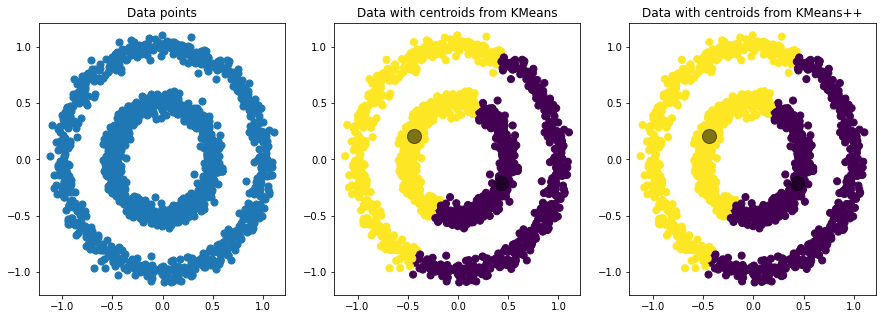

In [16]:

X, y = make_circles(n_samples=1500, factor=.5, noise=.05)

# KMeans from sklearn
kmeans = KMeans(n_clusters=2, max_iter=30, n_init=10, random_state=0)
y_kmeans_sklearn = kmeans.fit_predict(X)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
# adding subplot title
plt.title('Data points')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_sklearn, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# adding subplot title
plt.title('Data with centroids from KMeans')

# KMeans++ from sklearn
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=30, n_init=10, random_state=0)
y_kmeans_sklearn = kmeans.fit_predict(X)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_sklearn, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# adding subplot title
plt.title('Data with centroids from KMeans++')
plt.show()


> Notice how kmeans is unable to perform good in case of above circular type of data. This is where spectral clustering performs good. Lets look at spectral clustering next.

### Spectral clustering

Spectral clustering is a clustering algorithm that uses the spectrum (eigenvalues) of a similarity matrix to perform dimensionality reduction and clustering. It works by representing the data points as nodes in a graph, where the edges between the nodes represent the similarity between the data points. The algorithm then constructs a Laplacian matrix from the graph, and uses the eigenvectors of the Laplacian matrix to form clusters.

By using the eigenvectors of the Laplacian matrix, spectral clustering can effectively reduce the dimensionality of the data and identify clusters that may not be apparent in the original feature space. The similarity matrix can be constructed using various similarity metrics, such as the Gaussian radial basis function or the cosine similarity.

It can identify clusters of arbitrary shapes and sizes, and is not sensitive to the initial placement of the data points. Spectral clustering is also computationally efficient for large datasets, making it a popular choice for many applications in machine learning and data analysis.

Algorithm is as follows:
1. Construct a similarity graph A=A(X) of the data. This can be the k-NN graph or full connected graph or other similarity graphs.
2. Compute the Laplacian of the graph L = D-A
3. Compute top k eigenvectors of L and place them as columns in a matrix V 
4. Form W from V by normalizing each row
5. Run K-means to cluster the row vectors of W. 𝑥𝑖 is assigned to cluster α iff row 𝑖 of W is assigned to cluster α.

Time complexity: Spectral clustering has a time complexity of O(n^3) as it involves eigen decomposition

**Below is spectral clustering implemented from scratch**

In [17]:
def spectral_clustering(X:np.ndarray, k:int, graph_type:str='knn'):
    if graph_type == 'knn':
        knn = NearestNeighbors(n_neighbors=10, metric='euclidean')
        knn.fit(X)
        A = knn.kneighbors_graph(X).toarray()
    elif graph_type == 'full':
        A = np.ones((X.shape[0], X.shape[0]))

    
    D = np.diag(np.sum(A, axis=1))
    L = D-A

    eig_vals, eig_vecs = np.linalg.eig(L)
    eig_vals, eig_vecs = eig_vals.real, eig_vecs.real
    
    idx = eig_vals.argsort()[:k]
    eig_vals = eig_vals[idx]
    U = eig_vecs[:,idx]
    U = U/np.linalg.norm(U, axis=1).reshape(-1,1)

    kmeans_obj = KMeans_from_scratch(k=k, centroids = 'kmeans++', max_iter=30, tolerance=1e-2)
    kmeans_obj.fit(U)
    labels = kmeans_obj.labels
    centroids = kmeans_obj.centroids

    return centroids, labels

In [18]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)

In [19]:
centroids, labels = spectral_clustering(X, 2)

first random selection of centriods are the points :[288 448]
ran for 1 iterations and created 2 clusters with sizes: [250, 250]


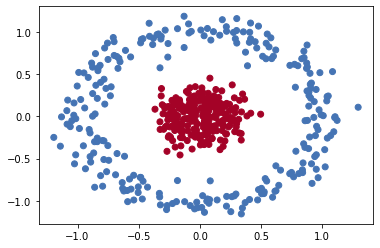

In [20]:
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])

/Users/raghavendrakommavarapu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Data with centroids from Spectral Clustering')

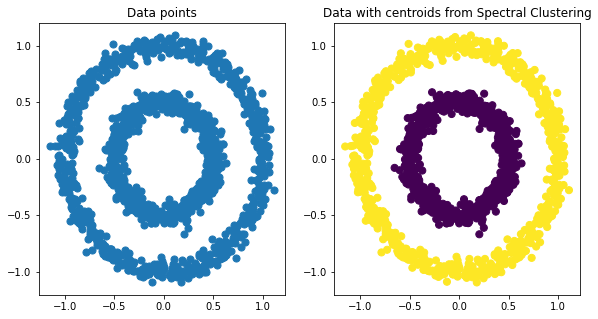

In [21]:
# Trying out spectral clustering on the make circles data set
X, y = make_circles(n_samples=1500, factor=.5, noise=.05)

# spectral clustering from sklearn
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, assign_labels='kmeans')
y_spectral_sklearn = spectral_clustering.fit_predict(X)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
# adding subplot title
plt.title('Data points')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_spectral_sklearn, s=50, cmap='viridis')
# adding subplot title
plt.title('Data with centroids from Spectral Clustering')

> Notice how spectral clustering performs perfectly for this dataset

In [22]:
# Evaluating the performance of spectral clustering
print(f'Rand index for the above dataset is {adjusted_rand_score(y, y_spectral_sklearn)}')
print(f'Mutual information based scores for the above dataset is {adjusted_mutual_info_score(y, y_spectral_sklearn)}')
print(f'Homogeneity, completeness and V-measure for the above dataset is {homogeneity_completeness_v_measure(y, y_spectral_sklearn)}') 
print(f'Davies-Bouldin index for the above dataset is {davies_bouldin_score(X, y_spectral_sklearn)}')
print(f'Calinski-Harabasz index for the above dataset is {calinski_harabasz_score(X, y_spectral_sklearn)}')


Rand index for the above dataset is 1.0
Mutual information based scores for the above dataset is 1.0
Homogeneity, completeness and V-measure for the above dataset is (1.0, 1.0, 1.0)
Davies-Bouldin index for the above dataset is 833.4846809226771
Calinski-Harabasz index for the above dataset is 0.001936292650926129


> Above evaluations also indicate spectral clustering has been very good at this dataset's clustering

In [2]:
class DBSCAN:
    """
    DBSCAN clustering algorithm
    """

    def __init__(self, eps: float, min_samples: int):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None
        self.clusters = None

    def fit(self, X: np.ndarray):
        self.labels = np.zeros(X.shape[0])
        self.clusters = dict()
        cluster_num = 0
        for idx, i in enumerate(X):
            if self.labels[idx] == 0:
                neighbors = self._region_query(X, i)
                if len(neighbors) < self.min_samples:
                    self.labels[idx] = -1
                else:
                    cluster_num = cluster_num + 1
                    self.labels[idx] = cluster_num
                    self.clusters.setdefault(cluster_num, set()).add(idx)
                    self._expand_cluster(X, i, neighbors, cluster_num)

    def _region_query(self, X: np.ndarray, point: np.ndarray):
        neighbors = []
        for idx, i in enumerate(X):
            if np.linalg.norm(i - point) <= self.eps:
                neighbors.append(idx)
        return neighbors

    def _expand_cluster(
        self,
        X: np.ndarray,
        point: np.ndarray,
        neighbors: list,
        cluster_num: int,
    ):
        for i in neighbors:
            if self.labels[i] == -1:
                self.labels[i] = cluster_num
                self.clusters.setdefault(cluster_num, set()).add(i)
            elif self.labels[i] == 0:
                self.labels[i] = cluster_num
                self.clusters.setdefault(cluster_num, set()).add(i)
                new_neighbors = self._region_query(X, X[i])
                if len(new_neighbors) >= self.min_samples:
                    neighbors = neighbors + new_neighbors

    def predict(self, X: np.ndarray):
        labels = np.zeros(X.shape[0])
        for idx, i in enumerate(X):
            neighbors = self._region_query(X, i)
            if len(neighbors) < self.min_samples:
                labels[idx] = -1
            else:
                labels[idx] = 1
        return labels

Text(0.5, 1.0, 'Data with centroids from DBSCAN')

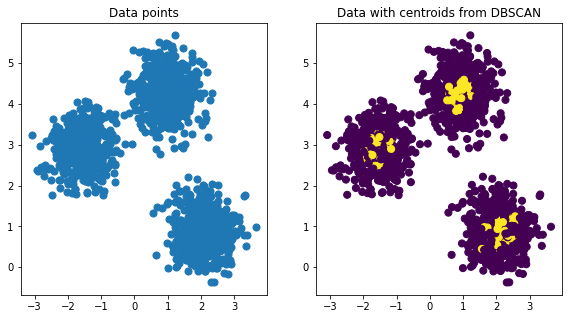

In [4]:
# Lets try DBSCAN on the make blobs data set
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.5, random_state=0)

# DBSCAN from sklearn
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(X)
y_dbscan_sklearn = dbscan.predict(X)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
# adding subplot title
plt.title('Data points')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan_sklearn, s=50, cmap='viridis')
# adding subplot title
plt.title('Data with centroids from DBSCAN')

#### Using clustering for image compression

In [23]:
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

In [24]:
image1 = rgb2gray(img_as_float(data.coffee()))

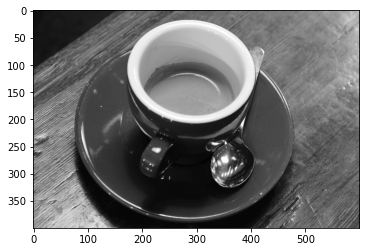

In [25]:
plt.imshow(image1, cmap='gray')

first random selection of centriods are the points :[  7550 174930 146480 117465]
ran for 4 iterations and created 4 clusters with sizes: [52808, 64797, 76387, 46008]


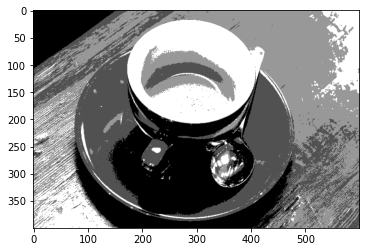

In [28]:
# With 4 clusters
n_clusters = 4

kmeans_obj = KMeans_from_scratch(k=n_clusters, centroids = 'kmeans++', max_iter=30, tolerance=1e-2)
kmeans_obj.fit(image1.reshape((-1, 1)))

vals, labels =     kmeans_obj.centroids, kmeans_obj.labels

img_compressed = np.choose(labels, vals)
img_compressed.shape = image1.shape # bringing back to proper image shape

plt.imshow(img_compressed, cmap=plt.cm.gray)

first random selection of centriods are the points :[204264 175920 183952 223101  11908  92139 102751 239476  43025  70993
  76754 173196 154687 161036 167062]
ran for 2 iterations and created 15 clusters with sizes: [24960, 15466, 7323, 10695, 24994, 21464, 14705, 16662, 21785, 21431, 23067, 16580, 10239, 7064, 3565]


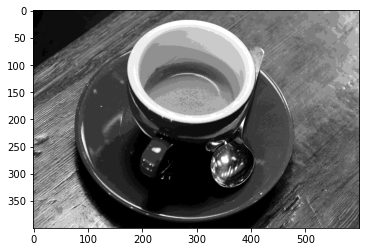

In [30]:
# With 15 clusters
n_clusters = 15

kmeans_obj = KMeans_from_scratch(k=n_clusters, centroids = 'kmeans++', max_iter=30, tolerance=1e-2)
kmeans_obj.fit(image1.reshape((-1, 1)))

vals, labels =     kmeans_obj.centroids, kmeans_obj.labels

img_compressed = np.choose(labels, vals)
img_compressed.shape = image1.shape # bringing back to proper image shape

plt.imshow(img_compressed, cmap=plt.cm.gray)

We can see in above image compressions, that using kmeans we could construct the image almost as clear as original with just 15 clusters